In [32]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support, classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import f1_score
%matplotlib inline

In [218]:
#df=pd.read_csv('cases_train_preprocessed.csv')

/Users/timothywaikinlam/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df=pd.read_csv('../results/cases_train_preprocessed.csv')

## Preparing data for building model

In [219]:
def convertText(x):
    if x == '[]':
        return 0
    else:
        return 1
df['additional_information'] = df['additional_information'].apply(convertText)

In [220]:
def convertText(x):
    if x == '':
        return 0
    else:
        return 1
df['source'] = df['source'].apply(convertText)

In [221]:
y = df['outcome']
df=df.drop(columns=['province', 'country','Last_Update', 'land', 'outcome'])

In [223]:
df.head()

,age,latitude,longitude,date_confirmation,additional_information,source,Confirmed,Deaths,Recovered,Active,...,sex_Not Available,sex_female,sex_male,age_range_ind_False,age_range_ind_Missing,age_range_ind_True,age_range_adult,age_range_baby,age_range_child,age_range_senior
0,47.0,59.7294,13.2354,1.590822e+09,0,1,1241.0,73.0,0.0,1168.0,...,1,0,0,0,1,0,1,0,0,0
1,47.0,35.2923,-2.9381,1.586934e+09,0,1,664.0,4.0,125.0,535.0,...,1,0,0,0,1,0,1,0,0,0
2,47.0,55.9903,13.5958,1.587625e+09,0,1,5366.0,276.0,0.0,5090.0,...,1,0,0,0,1,0,1,0,0,0
3,47.0,59.6025,18.1384,1.586848e+09,0,1,23739.0,2400.0,0.0,21339.0,...,1,0,0,0,1,0,1,0,0,0
4,47.0,59.6714,16.2159,1.588057e+09,0,1,2854.0,183.0,0.0,2671.0,...,1,0,0,0,1,0,1,0,0,0


In [222]:
for col in df.dtypes[df.dtypes == "object"].index:
    for_dummy = df.pop(col)
    df = pd.concat([df, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [231]:
print(f'label_Y : {y.shape}')
print(f'df_X : {df.shape}')

label_Y : (366600,)
df_X : (366600, 22)


## Split Data

In [250]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state = 1)

## Building model with default parameters

For this milestone, I build the model with default parameters, later on I will be tuning all the combinations of hyperparameters to find the best model.

In [251]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [236]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [252]:
print (f'Train Accuracy - : {rf.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf.score(x_test,y_test):.3f}')

Train Accuracy - : 0.889
Test Accuracy - : 0.874


In [253]:
print('Test accuracy: ', accuracy_score(y_test, rf.predict(x_test)))
print('Test overall recall: ', recall_score(y_test, rf.predict(x_test), average='macro'))

Test accuracy:  0.8741953082378614
Test overall recall:  0.6770858746581232


## Building model with other parameters


In [238]:
rf2 = RandomForestClassifier(n_estimators=40)
rf2.fit(x_train, y_train)

RandomForestClassifier(n_estimators=40)

In [239]:
print (f'Train Accuracy - : {rf2.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf2.score(x_test,y_test):.3f}')

Train Accuracy - : 0.888
Test Accuracy - : 0.875


In [240]:
print('Test accuracy: ', accuracy_score(y_test, rf2.predict(x_test)))
print('Test overall recall: ', recall_score(y_test, rf2.predict(x_test), average='macro'))

Test accuracy:  0.8749863611565739
Test overall recall:  0.6797833324681253


## Checking for Overfitting

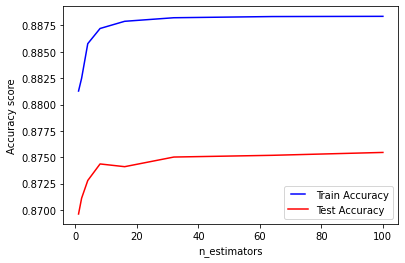

In [233]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
train = []
test = []

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    rf.fit(x_train, y_train)
    train.append(accuracy_score(y_train, rf.predict(x_train)))
    test.append(accuracy_score(y_test, rf.predict(x_test)))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train, "b", label="Train Accuracy")
line2, = plt.plot(n_estimators, test, "r", label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("n_estimators")
plt.show()

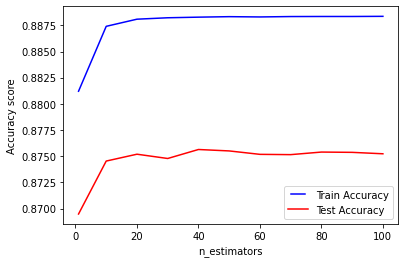

In [237]:
n_estimators = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train = []
test = []

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    rf.fit(x_train, y_train)
    train.append(rf.score(x_train,y_train))
    test.append(rf.score(x_test,y_test))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train, "b", label="Train Accuracy")
line2, = plt.plot(n_estimators, test, "r", label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy score")
plt.xlabel("n_estimators")
plt.show()

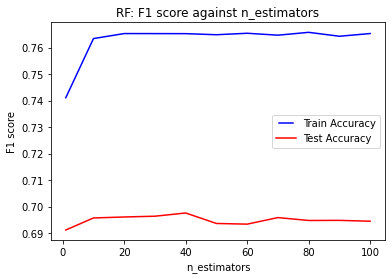

In [270]:
from sklearn.metrics import f1_score
n_estimators = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train = []
test = []

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    rf.fit(x_train, y_train)
    train.append(f1_score(y_train, rf.predict(x_train), average='macro'))
    test.append(f1_score(y_test, rf.predict(x_test), average='macro'))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train, "b", label="Train Accuracy")
line2, = plt.plot(n_estimators, test, "r", label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("F1 score")
plt.xlabel("n_estimators")
plt.title('RF: F1 score against n_estimators')
plt.show()

[]

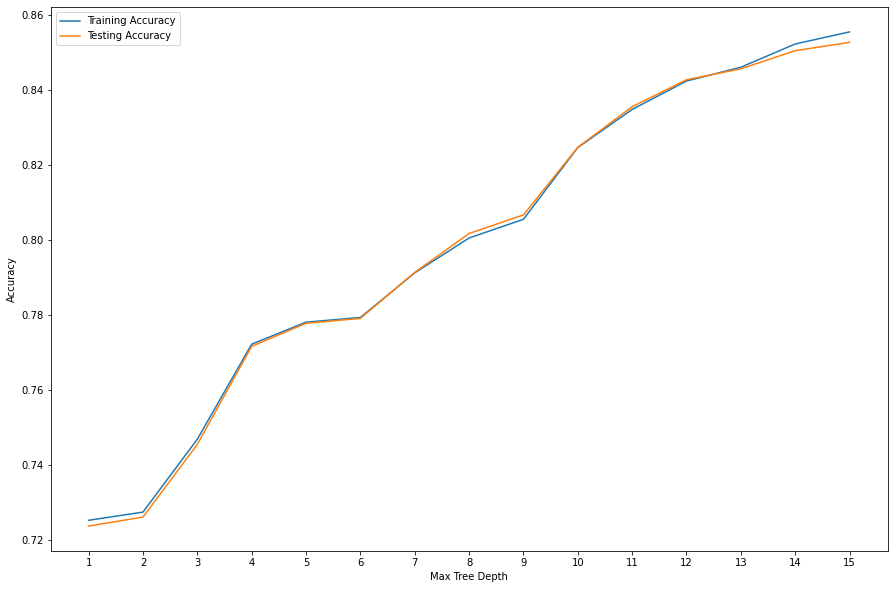

In [242]:
max_depth_list = np.linspace(1, 15, num=15)

train_accuracy = []
test_accuracy = []

for i in max_depth_list:
    rfc = RandomForestClassifier(max_depth=int(i)) 
    rfc.fit(x_train,y_train)
    train_accuracy.append(rfc.score(x_train, y_train))
    test_accuracy.append(rfc.score(x_test, y_test))

x = np.arange(len(max_depth_list)) + 1
plt.figure(figsize=(15,10))
plt.xticks(x)
plt.plot(x, train_accuracy, label='Training Accuracy')
plt.plot(x, test_accuracy, label='Testing Accuracy')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

[]

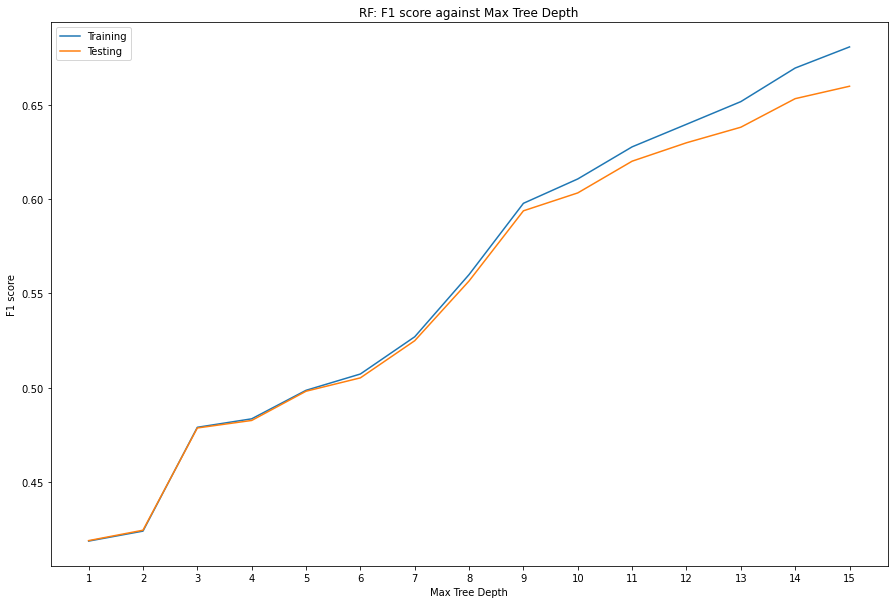

In [272]:
max_depth_list = np.linspace(1, 15, num=15)

train_accuracy = []
test_accuracy = []

for i in max_depth_list:
    rfc = RandomForestClassifier(max_depth=int(i)) 
    rfc.fit(x_train,y_train)
    train_accuracy.append(f1_score(y_train, rfc.predict(x_train), average='macro'))
    test_accuracy.append(f1_score(y_test, rfc.predict(x_test), average='macro'))

x = np.arange(len(max_depth_list)) + 1
plt.figure(figsize=(15,10))
plt.xticks(x)
plt.plot(x, train_accuracy, label='Training')
plt.plot(x, test_accuracy, label='Testing')
plt.xlabel('Max Tree Depth')
plt.ylabel('F1 score')
plt.title('RF: F1 score against Max Tree Depth')
plt.legend()
plt.plot()

As we can see in the graph, when the max tree depth is increasing, it observes more overfitting in the model

## Saving and loading model

In [274]:
import pickle
filename = 'RandomForestModel.pkl'
pickle.dump(rf, open(filename,'wb'))

In [275]:
model = pickle.load(open(filename,'rb'))

## Matrix Evaluation

### Evaluating Matrix for Test set

Text(0.5, 1.0, 'Confusion matrix for test set')

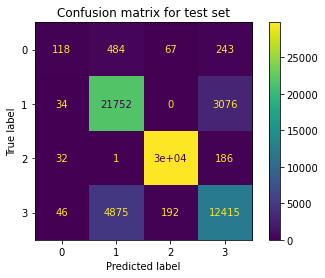

In [276]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_test_pred = model.predict(x_test)
test_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(test_matrix).plot()
plt.title('Confusion matrix for test set')

In [277]:
from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support, classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score, accuracy_score

print('Test accuracy: ', accuracy_score(y_test, model.predict(x_test)))
print('Test overall recall: ', recall_score(y_test, model.predict(x_test), average='macro'))

Test accuracy:  0.8740316421167486
Test overall recall:  0.6763237854196374


In [278]:
ev_va_report = classification_report(y_test, model.predict(x_test))
print('Testset')
print(ev_va_report)

Testset
                 precision    recall  f1-score   support

       deceased       0.51      0.13      0.21       912
   hospitalized       0.80      0.87      0.84     24862
nonhospitalized       0.99      0.99      0.99     30018
      recovered       0.78      0.71      0.74     17528

       accuracy                           0.87     73320
      macro avg       0.77      0.68      0.69     73320
   weighted avg       0.87      0.87      0.87     73320



### Evaluating Matrix for Train set

Text(0.5, 1.0, 'Confusion matrix for train set')

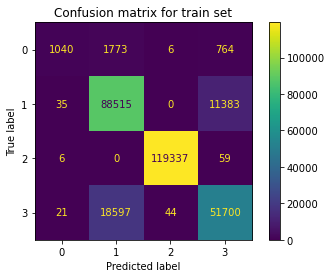

In [279]:
y_train_pred = model.predict(x_train)
train_matrix = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(train_matrix).plot()
plt.title('Confusion matrix for train set')

In [280]:
print('Train accuracy: ', accuracy_score(y_train, model.predict(x_train)))
print('Train overall recall: ', recall_score(y_train, model.predict(x_train), average='macro'))

Train accuracy:  0.888543371522095
Train overall recall:  0.7275575593308818


In [281]:
ev_train_report = classification_report(y_train, model.predict(x_train))
print('Trainset')
print(ev_train_report)

Trainset
                 precision    recall  f1-score   support

       deceased       0.94      0.29      0.44      3583
   hospitalized       0.81      0.89      0.85     99933
nonhospitalized       1.00      1.00      1.00    119402
      recovered       0.81      0.73      0.77     70362

       accuracy                           0.89    293280
      macro avg       0.89      0.73      0.77    293280
   weighted avg       0.89      0.89      0.89    293280

